In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import keras as keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, Adamax, Nadam, Adadelta
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import math
from keras import backend as K

Using TensorFlow backend.


In [2]:
#tf.enable_eager_execution()

In [3]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [4]:
def confusion_matrix_report(y_true, y_pred):    
    cm, labels = confusion_matrix(y_true, y_pred), unique_labels(y_true, y_pred)
    column_width = max([len(str(x)) for x in labels] + [5])  # 5 is value length
    report = " " * column_width + " " + "{:_^{}}".format("Prediction", column_width * len(labels))+ "\n"
    report += " " * column_width + " ".join(["{:>{}}".format(label, column_width) for label in labels]) + "\n"
    for i, label1 in enumerate(labels):
        report += "{:>{}}".format(label1, column_width) + " ".join(["{:{}d}".format(cm[i, j], column_width) for j in range(len(labels))]) + "\n"
    return report

In [5]:
red = pd.read_csv('data/winequality-red1.csv')
white = pd.read_csv('data/winequality-white1.csv')

In [6]:
conditions = [(white['quality'] <= 5),
              (white['quality'] >= 7)]
choices = [0, 2]
white['quality_class'] = np.select(conditions, choices, default = 1)
conditions = [(red['quality'] <= 5),
              (red['quality'] >= 7)]
red['quality_class'] = np.select(conditions, choices, default = 1)

In [7]:
for column in white:
    if column != 'quality' and column != 'quality_class':
        mean = white[column].mean()
        sd = white[column].std()
        white[column] = (white[column]-mean)/sd
for column in red:
    if column != 'quality' and column != 'quality_class':
        mean = red[column].mean()
        sd = red[column].std()
        red[column] = (red[column]-mean)/sd

In [8]:
white_data = white.drop(['quality', 'quality_class'], axis = 1)
red_data = red.drop(['quality', 'quality_class'], axis = 1)

In [19]:
white_class = white['quality_class']
red_class = red['quality_class']

In [21]:
white_sk_train, white_sk_test = train_test_split(white, test_size=0.25, random_state=42, stratify=white_class)
red_sk_train, red_sk_test = train_test_split(red, test_size=0.25, random_state=42, stratify=red_class)

In [22]:
white_data_train = white_sk_train.drop(['quality', 'quality_class'], axis = 1)
white_data_test = white_sk_test.drop(['quality', 'quality_class'], axis = 1)
red_data_train = red_sk_train.drop(['quality', 'quality_class'], axis = 1)
red_data_test = red_sk_test.drop(['quality', 'quality_class'], axis = 1)

In [23]:
columns_red = ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide']
columns_white = ['alcohol', 'volatile acidity', 'free sulfur dioxide']

white_data_train_sel = pd.DataFrame(white_data_train, columns=columns_white)
white_data_test_sel = pd.DataFrame(white_data_test, columns=columns_white)
red_data_train_sel = pd.DataFrame(red_data_train, columns=columns_red)
red_data_test_sel = pd.DataFrame(red_data_test, columns=columns_red)

In [24]:
white_class_train = white_sk_train['quality_class']
white_class_test = white_sk_test['quality_class']
red_class_train = red_sk_train['quality_class']
red_class_test = red_sk_test['quality_class']

In [25]:
white_data = white_data.values
white_class = white_class.values
categorical_labels_white = to_categorical(white_class, num_classes=None)
red_data = red_data.values
red_class = red_class.values
categorical_labels_red = to_categorical(red_class, num_classes=None)

In [26]:
white_data_train = white_data_train.values
white_class_train = white_class_train.values
white_data_train_sel = white_data_train_sel.values
categorical_labels_train = to_categorical(white_class_train, num_classes=None)
white_data_test = white_data_test.values
white_class_test = white_class_test.values
white_data_test_sel = white_data_test_sel.values
categorical_labels_test = to_categorical(white_class_test, num_classes=None)

In [27]:
red_data_train = red_data_train.values
red_class_train = red_class_train.values
red_data_train_sel = red_data_train_sel.values
categorical_labels_train = to_categorical(red_class_train, num_classes=None)
red_data_test = red_data_test.values
red_class_test = red_class_test.values
red_data_test_sel = red_data_test_sel.values
categorical_labels_test = to_categorical(red_class_test, num_classes=None)

In [28]:
validation_red = [red_data_test, red_class_test]
validation_white = [white_data_test, white_class_test]

In [29]:
validation_red_sel = [red_data_test_sel, red_class_test]
validation_white_sel = [white_data_test_sel, white_class_test]

# Actual models etc.

In [389]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(33, activation='sigmoid'))
model.add(layers.Dense(132, activation='sigmoid'))
model.add(layers.LeakyReLU(alpha=.001))
model.add(layers.Dense(33))
model.add(layers.Dense(3, activation='softmax'))

In [1085]:
#very deep net for red
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(128, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(12, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.Dense(3, activation='softmax'))

In [51]:
#Less deep net for white and red
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(12, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.Dense(3, activation='softmax'))

In [97]:
#Less deep net 2 for white
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(96, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(12, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.Dense(3, activation='softmax'))

In [92]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(24, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(72, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))

model.add(layers.Dense(72, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(72, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.AlphaDropout(0.01))
model.add(layers.Dense(12, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
model.add(layers.Dense(3, activation='softmax'))

In [566]:
model = tf.keras.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(36, activation='relu'))
model.add(layers.Dense(36*2, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(36, activation='relu'))
#model.add(layers.Dense(15))
model.add(layers.Dense(3, activation='softmax'))

In [102]:
model = tf.keras.Sequential()
#model.add(layers.Flatten())
#model.add(layers.Dense(48, activation='selu', kernel_initializer='lecun_normal', bias_initializer='lecun_normal'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(24, activation='elu'))
#model.add(layers.Dense(18))
model.add(layers.Dense(3, activation='softmax'))

In [103]:
#opt = SGD(lr=0.01)
#opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### With feature selection

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


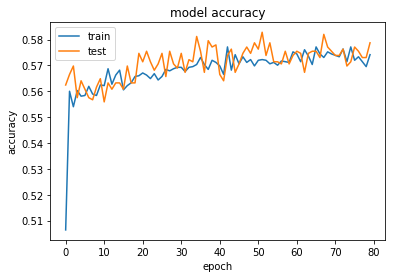

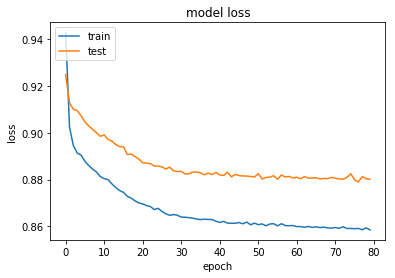

In [104]:
# Fit the model
history = model.fit(white_data_train_sel, white_class_train, validation_data=validation_white_sel, epochs=80, verbose=0)
#history = model.fit(white_data_train_sel, white_class_train_sel, validation_data=validation_white, epochs=150, verbose=0)
#history = model.fit(white_data, white_class, validation_split=0.33, epochs=100, verbose=0, batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
predictions = model.predict_classes(white_data_test_sel)

In [106]:
print('rmse: ' )
print(math.sqrt(np.mean((white_class_test-predictions)*(white_class_test-predictions))))
print('acc: ' )
print(accuracy_score(white_class_test, predictions))
print(confusion_matrix_report(white_class_test, predictions))
print(classification_report(white_class_test, predictions))

rmse: 
0.6892764618179896
acc: 
0.5787755102040816
      __Prediction___
         0     1     2
    0  233   170     7
    1  114   379    57
    2   15   153    97

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       410
           1       0.54      0.69      0.61       550
           2       0.60      0.37      0.46       265

   micro avg       0.58      0.58      0.58      1225
   macro avg       0.60      0.54      0.55      1225
weighted avg       0.59      0.58      0.57      1225



### Without feature selection

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


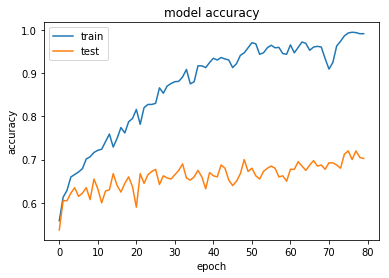

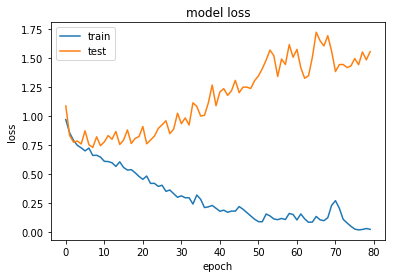

In [53]:
# Fit the model
history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=80, verbose=0)
#history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=150, verbose=0)
#history = model.fit(red_data, red_class, validation_split=0.33, epochs=100, verbose=0, batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
predictions = model.predict_classes(red_data_test)

In [55]:
print('rmse: ' )
print(math.sqrt(np.mean((red_class_test-predictions)*(red_class_test-predictions))))
print('acc: ' )
print(accuracy_score(red_class_test, predictions))
print(confusion_matrix_report(red_class_test, predictions))
print(classification_report(red_class_test, predictions))

rmse: 
0.5787918451395113
acc: 
0.7025
      __Prediction___
         0     1     2
    0  147    35     4
    1   45    97    18
    2    1    16    37

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       186
           1       0.66      0.61      0.63       160
           2       0.63      0.69      0.65        54

   micro avg       0.70      0.70      0.70       400
   macro avg       0.68      0.69      0.69       400
weighted avg       0.70      0.70      0.70       400



# "Saved" results

In [ ]:
# Less deep net 9 selu red

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


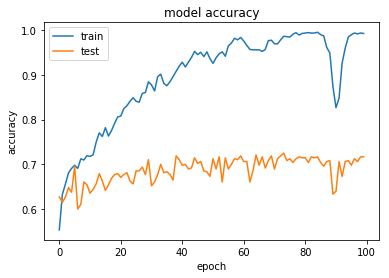

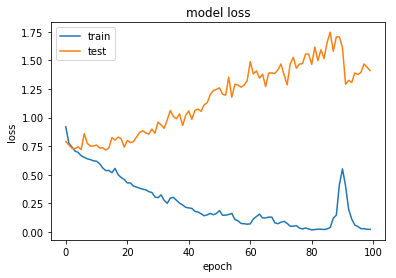

In [956]:
# Fit the model
history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=100, verbose=0)
#history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=150, verbose=0)
#history = model.fit(red_data, red_class, validation_split=0.33, epochs=100, verbose=0, batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [957]:
predictions = model.predict_classes(red_data_test)

In [958]:
print('rmse: ' )
print(math.sqrt(np.mean((red_class_test-predictions)*(red_class_test-predictions))))
print('acc: ' )
print(accuracy_score(red_class_test, predictions))
print(confusion_matrix_report(red_class_test, predictions))
print(classification_report(red_class_test, predictions))

rmse: 
0.5552777082985894
acc: 
0.7166666666666667
      __Prediction___
         0     1     2
    0  179    41     3
    1   48   122    22
    2    1    21    43

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       223
           1       0.66      0.64      0.65       192
           2       0.63      0.66      0.65        65

   micro avg       0.72      0.72      0.72       480
   macro avg       0.69      0.70      0.70       480
weighted avg       0.72      0.72      0.72       480



In [ ]:
# Less deep net fpr white

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


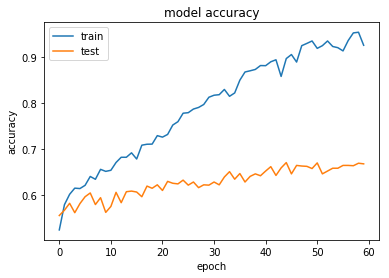

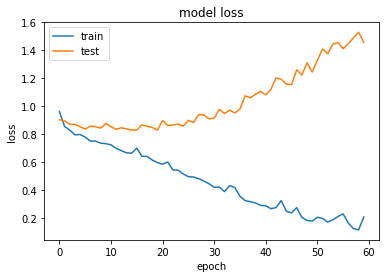

In [923]:
# Fit the model
history = model.fit(white_data_train, white_class_train, validation_data=validation_white, epochs=60, verbose=0)
#history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=150, verbose=0)
#history = model.fit(red_data, red_class, validation_split=0.33, epochs=100, verbose=0, batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [924]:
predictions = model.predict_classes(white_data_test)

In [925]:
print('rmse: ' )
print(math.sqrt(np.mean((white_class_test-predictions)*(white_class_test-predictions))))
print('acc: ' )
print(accuracy_score(white_class_test, predictions))
print(confusion_matrix_report(white_class_test, predictions))
print(classification_report(white_class_test, predictions))

rmse: 
0.6335302236023843
acc: 
0.6680272108843538
      __Prediction___
         0     1     2
    0  331   148    13
    1  117   443   100
    2   21    89   208

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       492
           1       0.65      0.67      0.66       660
           2       0.65      0.65      0.65       318

   micro avg       0.67      0.67      0.67      1470
   macro avg       0.67      0.67      0.67      1470
weighted avg       0.67      0.67      0.67      1470



In [ ]:
# 1 relu 32 nodes using adam with default learn rate

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


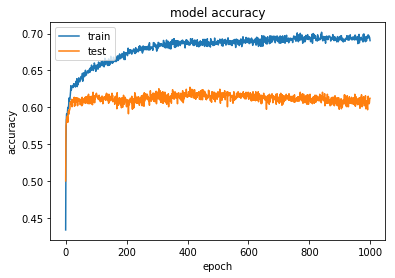

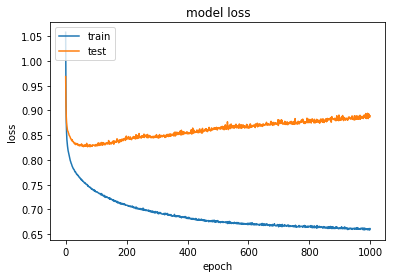

In [584]:
# Fit the model
history = model.fit(white_data_train, white_class_train, validation_data=validation_white, epochs=1000, verbose=0)
#history = model.fit(red_data_train, red_class_train, validation_data=validation_red, epochs=150, verbose=0)
#history = model.fit(red_data, red_class, validation_split=0.33, epochs=100, verbose=0, batch_size=64)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [585]:
predictions = model.predict_classes(white_data_test)

In [586]:
print('rmse: ' )
print(math.sqrt(np.mean((white_class_test-predictions)*(white_class_test-predictions))))
print('acc: ' )
print(accuracy_score(white_class_test, predictions))
print(confusion_matrix_report(white_class_test, predictions))
print(classification_report(white_class_test, predictions))

rmse: 
0.6670067159959286
acc: 
0.6122448979591837
      __Prediction___
         0     1     2
    0  313   165    14
    1  150   423    87
    2   14   140   164

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       492
           1       0.58      0.64      0.61       660
           2       0.62      0.52      0.56       318

   micro avg       0.61      0.61      0.61      1470
   macro avg       0.62      0.60      0.61      1470
weighted avg       0.61      0.61      0.61      1470



In [455]:
# OK results for one layer relu 64 nodes, 500 epochs

In [454]:
print('rmse: ' )
print(math.sqrt(np.mean((red_class_test-predictions)*(red_class_test-predictions))))
print('acc: ' )
print(accuracy_score(red_class_test, predictions))
print(confusion_matrix_report(red_class_test, predictions))
print(classification_report(red_class_test, predictions))

rmse: 
0.5737304826019501
acc: 
0.7020833333333333
      __Prediction___
         0     1     2
    0  170    51     2
    1   45   127    20
    2    3    22    40

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       223
           1       0.64      0.66      0.65       192
           2       0.65      0.62      0.63        65

   micro avg       0.70      0.70      0.70       480
   macro avg       0.69      0.68      0.68       480
weighted avg       0.70      0.70      0.70       480



In [ ]:
# OK results for one layer relu 32 nodes, 500 epochs, 

In [444]:
print('rmse: ' )
print(math.sqrt(np.mean((red_class_test-predictions)*(red_class_test-predictions))))
print('acc: ' )
print(accuracy_score(red_class_test, predictions))
print(confusion_matrix_report(red_class_test, predictions))
print(classification_report(red_class_test, predictions))

rmse: 
0.5968668193156661
acc: 
0.675
      __Prediction___
         0     1     2
    0  178    42     3
    1   57   113    22
    2    2    30    33

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       223
           1       0.61      0.59      0.60       192
           2       0.57      0.51      0.54        65

   micro avg       0.68      0.68      0.68       480
   macro avg       0.64      0.63      0.64       480
weighted avg       0.67      0.68      0.67       480



In [ ]:
# 2 selu + dropout

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


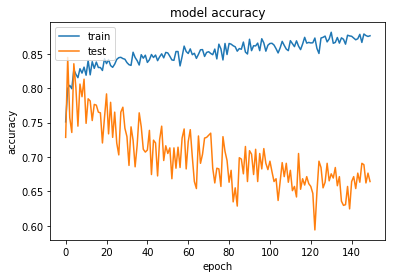

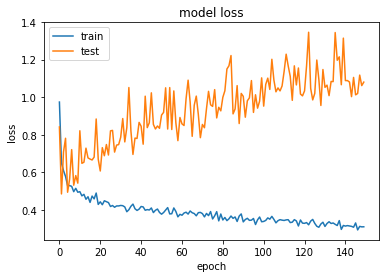

In [96]:
# Fit the model
history = model.fit(white_data, white_class, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Old way

In [129]:
model.fit(white_data_train, white_class_train, epochs=1000)

TypeError: __call__() got an unexpected keyword argument 'partition_info'

In [93]:
test_loss, test_acc = model.evaluate(white_data_test, white_class_test)
print('Test accuracy:', test_acc)

980/980 [==============================] - 0s 31us/step
Test accuracy: 0.6561224484930233


In [94]:
predictions = model.predict_classes(white_data_test)

In [95]:
print('rmse: ' )
print(math.sqrt(np.mean((white_class_test-predictions)*(white_class_test-predictions))))
print('acc: ' )
print(accuracy_score(white_class_test, predictions))
print(confusion_matrix_report(white_class_test, predictions))
print(classification_report(white_class_test, predictions))

rmse: 
0.6554325569688264
acc: 
0.6561224489795918
      __Prediction___
         0     1     2
    0  207   100    14
    1   83   298    51
    2   14    75   138

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       321
           1       0.63      0.69      0.66       432
           2       0.68      0.61      0.64       227

   micro avg       0.66      0.66      0.66       980
   macro avg       0.66      0.65      0.65       980
weighted avg       0.66      0.66      0.66       980



## Cross Validation

In [32]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [33]:
neural_net = KerasClassifier(model)

In [34]:
prediction_red = cross_val_predict(neural_net, red_data, red_class, cv=cv)

TypeError: __call__() missing 1 required positional argument: 'inputs'

In [ ]:
print(accuracy_score(red_class, prediction_red))
print(confusion_matrix_report(red_class, prediction_red))
print(classification_report(red_class, prediction_red))